<a href="https://colab.research.google.com/github/AnVo01/AI/blob/AI/Robot_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def sind(x):
    return math.sin(math.radians(x))
 
def cosd(x):
    return math.cos(math.radians(x))

Px=[]
Py=[]
tt1=[]
tt2=[]
tt3=[]
alpha=[]
for phi in range(0,90,45):
  for i in range(-90,90,1):
    for j in range(-45,45,1):
      k = phi - i - j
      Px.append(50*cosd(i) + 40*cosd(i+j) +  20*cosd(i+j+k))
      Py.append(50*sind(i) + 40*sind(i+j) + 20*sind(i+j+k))
      tt1.append(math.radians(i))
      tt2.append(math.radians(j))
      tt3.append(math.radians(k))
      alpha.append(math.radians(phi))

data = pd.DataFrame(np.c_[tt1,tt2,tt3,alpha,Px,Py],columns=['tt1','tt2','tt3','phi','Px','Py'])
y = data.drop(['Px','Py','phi'],axis=1)
x = data.drop(['tt1','tt2','tt3'],axis=1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = Sequential()
model.add(Dense(1000,activation='relu',input_shape=(3,)))
model.add(Dense(1000,activation='relu'))
model.add(Dense(3))

model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
203/203 [==============================] - 6s 25ms/step - loss: 23.1881 - accuracy: 0.6126 - val_loss: 0.2222 - val_accuracy: 0.8102
Epoch 2/10
203/203 [==============================] - 5s 24ms/step - loss: 0.2030 - accuracy: 0.8129 - val_loss: 0.1669 - val_accuracy: 0.8184
Epoch 3/10
203/203 [==============================] - 5s 24ms/step - loss: 0.1453 - accuracy: 0.8334 - val_loss: 0.1032 - val_accuracy: 0.8664
Epoch 4/10
203/203 [==============================] - 5s 24ms/step - loss: 0.1153 - accuracy: 0.8463 - val_loss: 0.1228 - val_accuracy: 0.8412
Epoch 5/10
203/203 [==============================] - 5s 24ms/step - loss: 0.1073 - accuracy: 0.8493 - val_loss: 0.0997 - val_accuracy: 0.8620
Epoch 6/10
203/203 [==============================] - 5s 24ms/step - loss: 0.1032 - accuracy: 0.8538 - val_loss: 0.0962 - val_accuracy: 0.8654
Epoch 7/10
203/203 [==============================] - 5s 24ms/step - loss: 0.1007 - accuracy: 0.8551 - val_loss: 0.0968 - val_accuracy: 0.867

In [29]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 1000)              4000      
                                                                 
 dense_58 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_59 (Dense)            (None, 3)                 3003      
                                                                 
Total params: 1,008,003
Trainable params: 1,008,003
Non-trainable params: 0
_________________________________________________________________


In [30]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('độ chính xác kiểm tra là: ',score[1])

Sai số kiểm tra là:  0.09865192323923111
độ chính xác kiểm tra là:  0.8629629611968994


In [31]:
data

,tt1,tt2,tt3,phi,Px,Py
0,-1.570796,-0.785398,2.356194,0.000000,-8.284271,-78.284271
1,-1.570796,-0.767945,2.338741,0.000000,-7.786335,-78.773592
2,-1.570796,-0.750492,2.321288,0.000000,-7.279934,-79.254148
3,-1.570796,-0.733038,2.303835,0.000000,-6.765224,-79.725793
4,-1.570796,-0.715585,2.286381,0.000000,-6.242361,-80.188383
...,...,...,...,...,...,...
32395,1.553343,0.698132,-1.466077,0.785398,-10.158060,95.220359
32396,1.553343,0.715585,-1.483530,0.785398,-10.696748,94.776298
32397,1.553343,0.733038,-1.500983,0.785398,-11.227605,94.322904
32398,1.553343,0.750492,-1.518436,0.785398,-11.750468,93.860313


In [32]:
model.predict(x_test)

array([[ 1.1066666e+00, -1.0219090e-01, -1.2359178e-01],
       [-4.2937341e-01, -4.9704224e-02,  1.2741268e+00],
       [ 5.9860438e-02,  6.7513436e-04, -1.0500708e-01],
       ...,
       [ 5.8806372e-01, -8.2705030e-03, -6.0704321e-01],
       [ 4.4405505e-01, -5.9542734e-02,  4.2296380e-01],
       [-1.2237518e-01, -1.2920811e-02,  1.0730648e-01]], dtype=float32)

In [33]:
y_test

,tt1,tt2,tt3
29562,1.012291,-0.052360,-0.174533
23051,-0.244346,-0.593412,1.623156
7889,-0.052360,0.244346,-0.191986
23604,-0.139626,-0.366519,1.291544
6922,-0.244346,0.645772,-0.401426
...,...,...,...
31568,1.396263,0.401426,-1.012291
4711,-0.663225,-0.244346,0.907571
9621,0.279253,0.628319,-0.907571
26764,0.471239,-0.191986,0.506145


In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
model.save('/content/gdrive/MyDrive/AI/Robot_2.h5')


In [35]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/AI/Robot_2.h5')

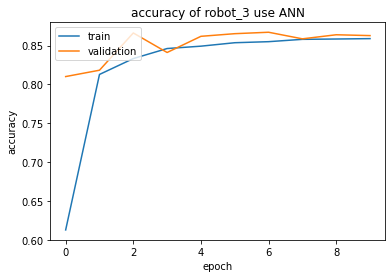

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of robot_3 use ANN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()